# 0. Imports and downloads

In [2]:
# Imports for data gathering 
import numpy as np
import websocket
import talib
import json
import pprint
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Downloads
!pip install websocket-client

# Install Ta-Lib
url = "https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files"
!wget $url/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget $url/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib

# Install Pandas, Matplotlib, datetime 
!pip install pandas
!pip install matplotlib
!pip install datetime

# 1. Gathering data

In [3]:
# Data gathering
closing_price = list()
date = list()


# Functions for socket-------------------------------
def on_open(ws):
    print('A connection has been opened')
    
def on_close(ws):
    print('The connection has been closed')
    
def on_message(ws, message):
    print('A message has been received')
    
    # Load it as a dict type 
    json_message = json.loads(message)
    
    # Dont need the first key 
    simple_data = json_message['k']
    
    # Append the message
    closing_price.append(simple_data['c'])
    date.append(datetime.now())
    
    
    
def on_error(ws, error):
    print(error)
    
# Defining socket-------------------------------------------
SOCKET = "wss://stream.binance.com:9443/ws/ethusdt@kline_1m"

## Connecting to Binance

## Websocket access 

In [ ]:
ws = websocket.WebSocketApp(SOCKET, on_open=on_open, on_close = on_close, on_message = on_message, on_error = on_error)
ws.run_forever()

_________________________________

# 2. Inspecting data and saving the file

### 2.1. Storing the Excel file

In [5]:
# Making index as correct date 
def list_to_datetime(dates_list):
    dates = list()
    
    for i in dates_list:
        # Correct time
        dt_string = i.strftime("%d/%m/%Y %H:%M:%S")
        # To Pandas
        datetime_pd = pd.to_datetime(dt_string)
        
        # Append
        dates.append(datetime_pd)
      
    pd_dates = pd.Series(dates)
    return pd_dates

In [6]:
# Dates as Pandas series to use for DataFrame
pd_date_index = list_to_datetime(date)

# Creating the DataFrame
df = pd.DataFrame(data = closing_price, index = pd_date_index, columns = ['Closing price'])

In [7]:
# Inspecting
df.head()

# Saving the file 
df.to_excel("data.xlsx")

In [11]:
df

,Closing price
2021-09-20 17:24:48,3088.61
2021-09-20 17:24:50,3088.76
2021-09-20 17:24:52,3088.71
2021-09-20 17:24:55,3088.27
2021-09-20 17:24:57,3088.01
...,...
2021-09-20 20:39:31,3036.44
2021-09-20 20:39:33,3035.93
2021-09-20 20:39:35,3035.73
2021-09-20 20:39:37,3034.58


### 2.2. Loading the Excel file and preparing for analysis

In [12]:
# Data in data 
df = pd.read_excel('data.xlsx', index_col = 0)

In [13]:
# Inspect
display(df.head())
print('')
display(df.info())

,Closing price
2021-09-20 17:24:48,3088.61
2021-09-20 17:24:50,3088.76
2021-09-20 17:24:52,3088.71
2021-09-20 17:24:55,3088.27
2021-09-20 17:24:57,3088.01


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5450 entries, 2021-09-20 17:24:48 to 2021-09-20 20:39:39
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Closing price  5450 non-null   float64
dtypes: float64(1)
memory usage: 85.2 KB


None

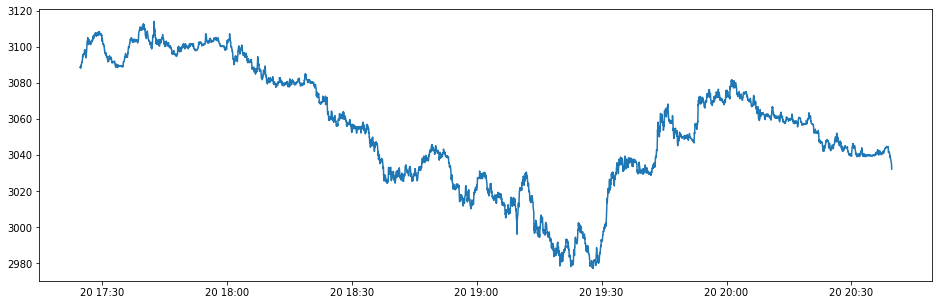

In [14]:
# Plot
plt.figure(figsize=(16,5))
plt.plot(df['Closing price'])

___________________________________

# 3. Creating the bot

In [197]:
import os
#os.chdir('data')
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.stattools import adfuller

# Plotting
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Network
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# DataAnalysis class. 
# For time series: x is dates, and y is the target column. Ensure that the date is properly set up in a datetime format
class DataAnalysis:
    '''
    The DataAnalysis class is used for objectives such as: 'Time Series', 'Classification' and 'Regression.' 
    '''
    
    def __init__(self, objective, df, y):
        
        '''
        To instantizate the class to an object, the objective must be defined, the dataframe must be loaded, and X and y 
        must be assigned. The info of the dataframe and a graph of the y variable against the index will be plotted.
        '''
        
        # Define objective 
        self.objective = objective
        print('The objective of the analysis is: ', objective)
        print('------------------------------------------------------------------------------')
        
        
        
        if self.objective.lower() == 'time series':
            print('The workflow for Time Series is following:\n')
            
            print('Step 0: Set variables.')
            print('Consider whether to train on entire dataset or subset')
            print('Consider the dates to test\n')
            
            print('Step 1: Check that the data is clean.')
            print('1.1. Look at the chart, are there big holes?')
            print('1.2. Use the function: DataAnalysis.identify_clean_time_series()')
            print('1.3. If the data is not clean, run DataAnalysis.clean_time_series_interpolate()')
            print('1.4. If the data is still not clean, this should be handled manually\n')
            
            print('Step 2: EDA')
            print('Step 2.1. Run DataAnalysis.plot_first_dates(), DataAnalysis.plot_last_dates()')
            print('2.2. Run DataAnalysis.decompose_time_series(), DataAnalysis.check_stationarity()')
            print('2.3. Plot ACF and PACF through statsmodels\n')
            
            print('Step 3: Forecasting')
            print('Step 3.1. Create model')
            print('Step 3.1.1. Split train and test data DataAnalysis.train_test_split_time_series()')
            print('Step 3.1.2. Split X and y data DataAnalysis.train_test_split_time_series()')
            print('Step 3.1.3. Create model with DataAnalysis.make_network_for_timeseries()\n')
            
            print('Step 3.2. Predict')
            print('Step 3.2.1. Run DataAnalysis.predict_time_series()\n')
            
            print('Step 3.3. Plot')
            print('Step 3.3.1. Run DataAnalysis.plot_time_series_predictions(test_X, test_y, y_preds, test_dates = test_dates\n)')
        
            print('------------------------------------------------------------------------------')
            
        
            # Assign dataframe 
            if isinstance(df, pd.DataFrame):
                self.df = df
                print('This is the DataFrame to be analyzed: ')
                display(df.head())
            elif isinstance(df, str):
                self.df = pd.read_csv(df) 
                print('The DataFrame to be analyzed is: ', df)
            else:
                print('Error, not appropriate input. Input should either be Pandas Dataframe or name of file')

            print('------------------------------------------------------------------------------')

            # Define x and y 
            #self.x = self.df[x]
            self.y = self.df[y]

            # Info
            print('This is the info of the dataframe \n')
            print(self.df.info(), '\n');
            print('------------------------------------------------------------------------------')


            # Plot y against index
            print('This is the plot of the Y variable with the index\n')
            plt.rcParams["figure.figsize"] = (20,3)
            self.y.plot()
            plt.show()

            # Time series components
            if self.objective == 'Time Series':
                print('Remember to consider: ')
                print('Does the series contain trend, seasonality or clear noise?')
                print('Does the series seem additivie, multiplicative or psuedo-additive?')
                print('Is the series stationary? Consider constant mean, constant variance, constant autocorrelation and periodic components')
        
        
    # Decomposing time series into trend, seasonality and residual 
    def decompose_time_series(self, decompose_series):
        '''
        The only argument needed is the series to be decomposed 
        '''
        self.decompose_series = decompose_series
        
        # Decompose
        ss_decomposition = seasonal_decompose(x=self.decompose_series)
        estimated_trend = ss_decomposition.trend
        estimated_seasonal = ss_decomposition.seasonal
        estimated_residual = ss_decomposition.resid

        # Plot
        plt.plot(estimated_trend)
        plt.title('Estimated trend')
        plt.show()
        plt.plot(estimated_seasonal, label = 'Estimated ')
        plt.title('Estimated seasonality')
        plt.show()
        plt.plot(estimated_residual)
        plt.title('Estimated residual')
        plt.show()
    
    # Identify whether the time series is clean
    def identify_clean_time_series(self, x, y):
        '''
        The time series is deemed clean if there are no null values.
        '''
        if self.df[y].isnull().sum() > 0:
            print('Y variable needs to be cleaned. It contains NaN values')
            print('The number of NaN values is: ', self.df[y].isnull().sum())
            print('--------------------------------------------------------')
        else:
            print('Y variable is clean')
    
    
    # Clean time series by interpolating 
    def clean_time_series_interpolate(self, y):
        '''
        The time series column will be interpolated, but if there are more missing values, it needs to be done manually.
        In the future, if certain usual problems occur, these should be incorporated.
        '''
        if self.df[y].isnull().sum() > 0:
            self.df[y] = self.df[y].interpolate()
            print('The data has been interpolated. Number of NaN values is: ', self.df[y].isnull().sum())
            
            if self.df[y].isnull().sum() > 0:
                print('It is still not clean, this needs special help. The number of NaN values is: ', 
                      self.df[y].isnull().sum())
            else:
                print('This series is clean')
        else:
            print('This series is clean')
            
    # Stationarity 
    def check_stationarity(self, df):
        '''
        Stationarity is important for certain time series models. Deep learning models can usually handle
        non-stationary data, however.
        '''
        print('The series can be assesed to be stationary with the help of histogram and Dickey-Fuller test')
        df.hist()
        plt.title('Distribution of data')
        plt.show()
        
        self.adf, self.pvalue, self.usedlag, self.nobs, self.critical_values, self.icbest = adfuller(df)
        print('The Dickey-Fuller test for stationarity reveals the following: ')
        print(f'ADF test value: {round(self.adf,2)} | P-value {self.pvalue}')
        
        print('----------------------------------------------------------------------')
        print('If stationarity is tested at a p-value of 0.05, ')
        if self.pvalue < 0.05:
            print('the series is stationary')
        elif self.pvalue > 0.05:
            print('the series is non-stationary')
        else:
            print('Something went wrong')
            
            
    # Get first dates for a time series.
    def get_first_dates(self, df, column, n_units):
        return self.df[column][:-n_units]
    
    # Plot the first dates 
    def plot_first_dates(self, df, column, n_units):
        print(f'This is the dates without the last {n_units} dates of {column}')
        self.get_first_dates(df, column,n_units).plot()
        plt.title(f'{column}')
        
    # Get last dates, useful for big datasets     
    def get_last_dates(self, df, column, n_units):
        return self.df[column][-n_units:]
    
    # Plotting last dates, always important to inspect the data 
    def plot_last_dates(self, df, column, n_units):
        print(f'This is the last {n_units} dates of {column}')
        self.get_last_dates(df, column,n_units).plot()
        plt.title(f'{column}')
    
    #HERE
    # TRAIN TEST SPLITTING 
    def train_test_split_time_series(self, df, y, test_dates, subset = False, subset_start = 0):
        
        '''
        The dataset is split into a train and test set. Subset can be set to True and a subset start can be specified
        for larger datasets. 
        '''
    
        # Split into first and last dates depeding on specified test_dates
        self.train = self.get_first_dates(self.df, y, test_dates)
        self.test = self.get_last_dates(self.df, y, test_dates)
        
        # Able to decrease size of data
        if subset == True:
            self.train = self.train[subset_start:]
        else:
            pass 
        
        print('The shape of the train set is: ', self.train.shape)
        print('The shape of the test set is: ', self.test.shape)
        
        #Return train and test
        return self.train, self.test
    
    # Splitting train and test into X and y
    def X_y_split_time_series(self, train, test, len_of_sequence, features = 1):
        self.train_X = []
        self.train_y = []
        
        for i in range(0, train.shape[0]-len_of_sequence):
            self.train_X.append(train[i:i+len_of_sequence])
            self.train_y.append(train[i+len_of_sequence])
        
        # Train X
        self.train_X = np.array(self.train_X)
        self.train_X = self.train_X.reshape(self.train_X.shape[0],self.train_X.shape[1],features)
        
        # Train y
        self.train_y = np.array(self.train_y)
        
        # Tests
        self.test_X = np.array(test[:len_of_sequence])
        self.test_y = np.array(test[len_of_sequence:])
        
        # Info
        print('The shape of train_X is: ', self.train_X.shape)
        print('The shape of train_y is: ', self.train_y.shape)
        print('The shape of test_X is: ', self.test_X.shape)
        print('The shape of test_y is: ', self.test_y.shape)
        
        
        return self.train_X, self.train_y, self.test_X, self.test_y
        
        
    # TIMESERIES------------------------------------------------------------------------------------------------------
    # CREATING THE NETWORK, timeseries 
    def make_network_for_timeseries(self, train_X, train_y, n_cells, epochs, cell1 = SimpleRNN, features = 1, 
                                    batch_size = 64, verbose = 2,
                                    loss='mean_squared_error', optimizer = 'adam'):
        
        # Initialize network object
        self.network = Sequential()
        
        # Make first hidden state
        self.network.add(cell1(n_cells, input_shape = (train_X.shape[1], features))) # return_sequences = True

        """
        # Make second hidden state
        self.network.add(cell1(n_cells, return_sequences = True))
        """
        
        # Add output layer
        self.network.add(Dense(1))
        
        # Compile and fit
        self.network.compile(loss=loss, optimizer=optimizer)
        self.network.fit(train_X, train_y, epochs = epochs, batch_size = batch_size, verbose = verbose)
        
        return self.network
    
    # PREDICTING, time series 
    def predict_time_series(self, network, test_X, test_y):
        self.test_X_copy = test_X.copy().reshape(1,-1,1)
        self.y_pred = []
        
        # Make predictions
        for _ in range(len(test_y)):
            self.pred = network.predict(self.test_X_copy)
            self.y_pred.append(self.pred)
            
            # Include new predictions as the last value and remove the first (for future, could make deque)
            self.test_X_copy[:, :-1, :] = self.test_X_copy[:, 1:, :]
            self.test_X_copy[:, -1, :] = self.pred 
        
        self.preds = np.array(self.y_pred).reshape(-1,1)
            
        return self.preds 
    
    
    # PLOTTING PREDICTIONS, time series 
    def plot_time_series_predictions(self, test_X, test_y, y_preds, test_dates):
        # Range
        start_range = range(1, test_X.shape[0]+1)
        predict_range = range(test_X.shape[0], test_dates)
        
        # Plotting
        plt.plot(start_range, test_X)
        plt.plot(predict_range, test_y, color = 'orange')
        plt.plot(predict_range, y_preds, color = 'teal', linestyle = '--')
        
        # Title and legend
        plt.title('Test data and predictions')
        plt.legend(['Initial Series','Target Series','Predictions'])
 

## The model

In [198]:
# Variables
df = pd.read_excel('data.xlsx', index_col = 0)
X = 0
y = 'Closing price'

The objective of the analysis is:  Time series
------------------------------------------------------------------------------
The workflow for Time Series is following:

Step 0: Set variables.
Consider whether to train on entire dataset or subset
Consider the dates to test

Step 1: Check that the data is clean.
1.1. Look at the chart, are there big holes?
1.2. Use the function: DataAnalysis.identify_clean_time_series()
1.3. If the data is not clean, run DataAnalysis.clean_time_series_interpolate()
1.4. If the data is still not clean, this should be handled manually

Step 2: EDA
Step 2.1. Run DataAnalysis.plot_first_dates(), DataAnalysis.plot_last_dates()
2.2. Run DataAnalysis.decompose_time_series(), DataAnalysis.check_stationarity()
2.3. Plot ACF and PACF through statsmodels

Step 3: Forecasting
Step 3.1. Create model
Step 3.1.1. Split train and test data DataAnalysis.train_test_split_time_series()
Step 3.1.2. Split X and y data DataAnalysis.train_test_split_time_series()
Step 3.1.3. 

,Closing price
2021-09-20 17:24:48,3088.61
2021-09-20 17:24:50,3088.76
2021-09-20 17:24:52,3088.71
2021-09-20 17:24:55,3088.27
2021-09-20 17:24:57,3088.01


------------------------------------------------------------------------------
This is the info of the dataframe 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5450 entries, 2021-09-20 17:24:48 to 2021-09-20 20:39:39
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Closing price  5450 non-null   float64
dtypes: float64(1)
memory usage: 85.2 KB
None 

------------------------------------------------------------------------------
This is the plot of the Y variable with the index



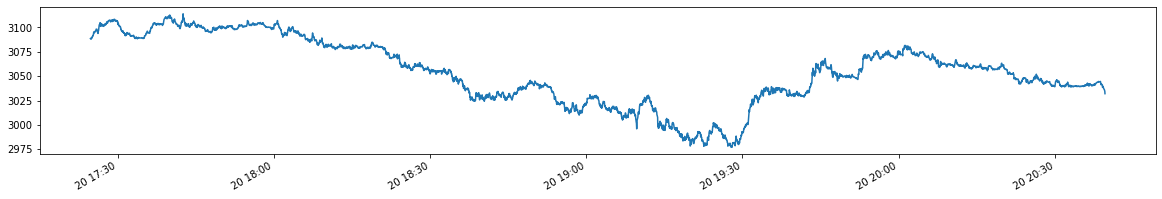

In [199]:
# Initialize the model 
model = DataAnalysis('Time series', df, y)

In [200]:
# Clean
# Check clean
print(model.df.isna().sum())
print('')

# Check if needs to be cleaned
model.identify_clean_time_series(0,y)

# Clean
model.clean_time_series_interpolate(y)

Closing price    0
dtype: int64

Y variable is clean
This series is clean


## EDA

This is the last 24 dates of Closing price


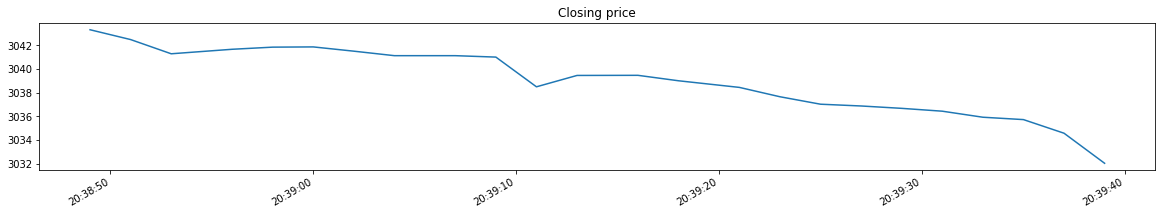

In [201]:
# EDA
# Lets take a look at the last 24 points 
model.get_last_dates(df, y, 24)
model.plot_last_dates(df, y, 24)

This is the dates without the last 12 dates of Closing price


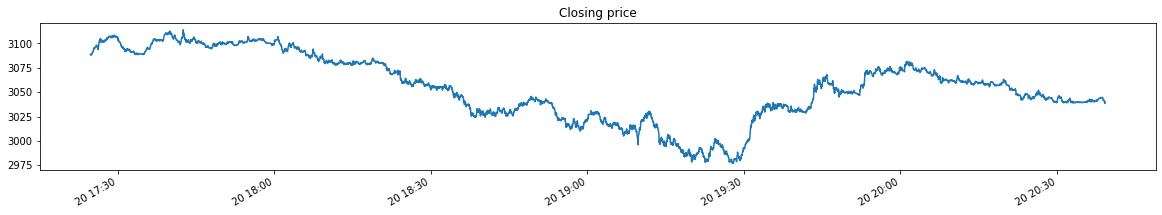

In [202]:
# And all points except the last 12 
model.get_first_dates(df, y, 12)
model.plot_first_dates(df, y, 12)

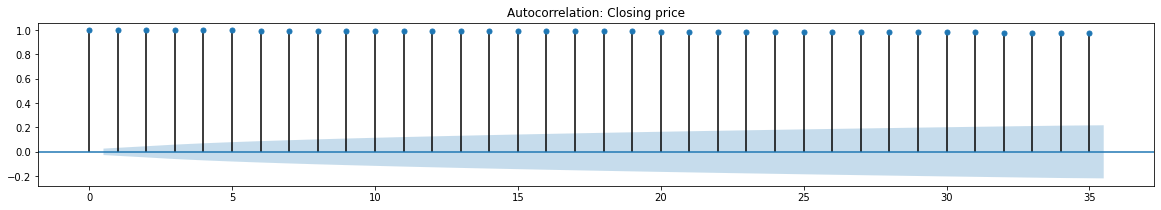

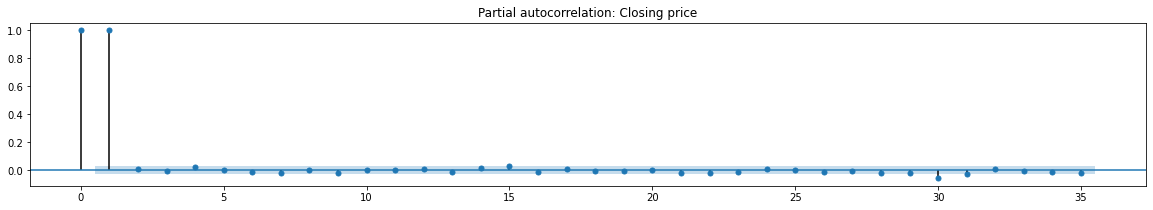

In [203]:
# ACF
plot_acf(model.df[y], title = f'Autocorrelation: {y}', lags = 35);

# PACF 
plot_pacf(model.df[y], title = f'Partial autocorrelation: {y}', lags = 35);

Comment on autocorrelation: Note the clear autocorrelatioon with prior values. This makes intuitive sense as the values span over such a narrow timeframe of mere seconds. Hardly any big shocks happen here

### Now, time to choose how many values to predict into the future

In [204]:
# Interested in testing last 24 points 
test_dates = 24

# Length of sequence (Here, we want to predict about 20 seconds into the future)
len_of_sequence = 12

## Train-test split, scaling and X and y

In [205]:
# Train
train, test = model.train_test_split_time_series(df, y, test_dates, subset = False, subset_start = 0)

# Scaling 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
train = scaler.fit_transform(train.values.reshape(-1,1))

test = scaler.fit_transform(test.values.reshape(-1,1))

# X and y split 
train_X, train_y, test_X, test_y = model.X_y_split_time_series(train, test, len_of_sequence, features = 1)

The shape of the train set is:  (5426,)
The shape of the test set is:  (24,)
The shape of train_X is:  (5414, 12, 1)
The shape of train_y is:  (5414, 1)
The shape of test_X is:  (12, 1)
The shape of test_y is:  (12, 1)


## MSE 

In [206]:
# Defining function to evaluate model 
def calc_MSE(test_y, y_preds):
    assert test_y.shape == y_preds.shape
    error = (test_y - y_preds).sum()
    sq_error = error**2
    mse = sq_error / len(test_y)
    
    return mse 

## Training the network - Single model

In [209]:
# Define values
epoch = 800
j = 300 #n_cells

# Create model
network = model.make_network_for_timeseries(train_X, train_y, cell1 = LSTM, n_cells=j, epochs=epoch, batch_size = 64, 
                                                    verbose = 1, loss='mean_squared_error', optimizer = 'adam')

# Summary 
network.summary() 

Epoch 1/800
85/85 [==============================] - 8s 76ms/step - loss: 0.0296
Epoch 2/800
85/85 [==============================] - 6s 71ms/step - loss: 0.0032
Epoch 3/800
85/85 [==============================] - 6s 73ms/step - loss: 0.0028
Epoch 4/800
85/85 [==============================] - 6s 76ms/step - loss: 0.0026
Epoch 5/800
85/85 [==============================] - 7s 76ms/step - loss: 0.0026
Epoch 6/800
85/85 [==============================] - 6s 72ms/step - loss: 0.0024
Epoch 7/800
85/85 [==============================] - 7s 78ms/step - loss: 0.0027
Epoch 8/800
85/85 [==============================] - 6s 75ms/step - loss: 0.0024
Epoch 9/800
85/85 [==============================] - 6s 72ms/step - loss: 0.0023
Epoch 10/800
85/85 [==============================] - 6s 72ms/step - loss: 0.0020
Epoch 11/800
85/85 [==============================] - 6s 76ms/step - loss: 0.0021
Epoch 12/800
85/85 [==============================] - 6s 75ms/step - loss: 0.0020
Epoch 13/800
85/85 [=====

In [210]:
# Predict
y_preds = model.predict_time_series(network, test_X, test_y)

# Performance
MSE = calc_MSE(test_y, y_preds)
print('Mean Squared Error for this combination is : ', round(MSE, 2))

Mean Squared Error for this combination is :  11.95


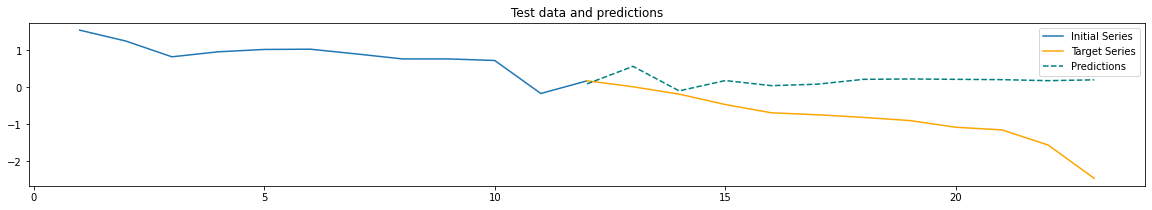

In [211]:
# Plotting 
model.plot_time_series_predictions(test_X, test_y, y_preds, test_dates = test_dates)

________________________________

## Training the network - Multiple

In [196]:
epoch_list = [100, 1000]
cell_units = [50, 250]

# Scaled?
# scaled = True, this step is not neccesary currently as the model makes no inverse transformation  

for i in epoch_list:
    for j in cell_units:
        print('Following combination is finished: ')
        print(f'Cell units = {j} | epochs = {i}')
        
        # Create model
        network = model.make_network_for_timeseries(train_X, train_y, cell1 = LSTM, n_cells=j, epochs=i, batch_size = 64, 
                                                    verbose = 1, loss='mean_squared_error', optimizer = 'adam')
        # Predict
        y_preds = model.predict_time_series(network, test_X, test_y)
        
        
        
        if scaled:
          # Only use this code if the entire data has been inversed: y_preds = MMscaler.inverse_transform(y_preds)

          # Performance 
          # Sometimes this is the correct, I have not yet identified issue: MSE = calc_MSE(test_y, y_preds.reshape(12))
          MSE = calc_MSE(test_y, y_preds)
          print('Mean Squared Error for this combination is : ', round(MSE, 2))

          # Plotting 
          model.plot_time_series_predictions(test_X, test_y, y_preds, test_dates = test_dates) 

        elif not scaled: 
          # Performance 
          MSE = calc_MSE(test_y, y_preds.reshape(12))
          print('Mean Squared Error for this combination is : ', round(MSE, 2))
          # Plotting
          model.plot_time_series_predictions(test_X, test_y, y_preds, test_dates = test_dates)
        
        plt.show() 

Following combination is finished: 
Cell units = 375 | epochs = 800
Epoch 1/800
85/85 [==============================] - 11s 107ms/step - loss: 0.0365
Epoch 2/800
85/85 [==============================] - 10s 113ms/step - loss: 0.0031
Epoch 3/800
85/85 [==============================] - 9s 110ms/step - loss: 0.0028
Epoch 4/800
85/85 [==============================] - 9s 103ms/step - loss: 0.0027
Epoch 5/800
85/85 [==============================] - 9s 110ms/step - loss: 0.0025
Epoch 6/800
85/85 [==============================] - 9s 111ms/step - loss: 0.0024
Epoch 7/800
85/85 [==============================] - 10s 112ms/step - loss: 0.0024
Epoch 8/800
85/85 [==============================] - 10s 116ms/step - loss: 0.0024
Epoch 9/800
85/85 [==============================] - 9s 112ms/step - loss: 0.0023
Epoch 10/800
85/85 [==============================] - 9s 107ms/step - loss: 0.0022
Epoch 11/800
85/85 [==============================] - 9s 109ms/step - loss: 0.0020
Epoch 12/800
85/85 [====

KeyboardInterrupt: ignored

________________________________________

# 4. Letting the bot trade

### The functions that govern the web socket - Not finished

In [ ]:
from collections import deque

# Data gathering
closing_price_for_trade = deque(np.zeros(12))
date_for_trade = deque(np.zeros(12))


# Functions for socket (On open, on close and on error are the same)-------------------------------
def on_open(ws):
    print('A connection has been opened')
    
def on_close(ws):
    print('The connection has been closed')
    
def on_message_for_trade(ws, message):
    print('A message has been received')
    
    # Load it as a dict type 
    json_message = json.loads(message)
    
    # Dont need the first key 
    simple_data = json_message['k']
    
    # Append the message, the newest value 
    closing_price_for_trade.append(simple_data['c'])
    date_for_trade.append(datetime.now())

    # Pop the left-most value, aka the earliest 
    closing_price_for_trade.popleft()
    date_for_trade.popleft()

    # Trading bot
    # run_trade_bot function 

    def on_error(ws, error):
    print(error)
    
# Defining socket-------------------------------------------
SOCKET = "wss://stream.binance.com:9443/ws/ethusdt@kline_1m"

### Loading and running the bot - Unfinished

In [ ]:
# Load in bot
# LOAD BOT WHICH IS SAVED AS A FILE (bot = load.bot('saved in this file'))

# Make rules for trading
# if len(closing_price_for_tade) = 12, make predictions. predictions = bot.predict(closing_price_for_trade)
# if bot says it will appreciate the next 12 data points, buy, if bot says it will depreciate the next 12 data points, sell if any is owned. 

# Initiate websocket access 
#ws = websocket.WebSocketApp(SOCKET, on_open=on_open, on_close = on_close, on_message = on_message, on_error = on_error)
#ws.run_forever()